<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Buen trabajo Jorge, tu notebook está completo y aprobado.
    
Saludos!    

</div>

-----

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Proyecto" data-toc-modified-id="Proyecto-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Proyecto</a></span><ul class="toc-item"><li><span><a href="#Librerias-utilizadas" data-toc-modified-id="Librerias-utilizadas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Librerias utilizadas</a></span></li><li><span><a href="#Funciones-utilizadas-en-el-proyecto" data-toc-modified-id="Funciones-utilizadas-en-el-proyecto-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Funciones utilizadas en el proyecto</a></span></li><li><span><a href="#Preparación-de-los-datos." data-toc-modified-id="Preparación-de-los-datos.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Preparación de los datos.</a></span></li><li><span><a href="#Entrenamiento-y-pruebas-de-modelos" data-toc-modified-id="Entrenamiento-y-pruebas-de-modelos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Entrenamiento y pruebas de modelos</a></span></li><li><span><a href="#Calculo-y-estadisticas-del-proyecto" data-toc-modified-id="Calculo-y-estadisticas-del-proyecto-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculo y estadisticas del proyecto</a></span></li></ul></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

### Introducción
​
Trabajamos en la compañía de extracción de petróleo OilyGiant. Tenemos que encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo. Para completar esta tarea, realizaremos los siguientes pasos:
​
- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
​
​
Tenemos los datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analizaremos los beneficios y riesgos potenciales utilizando la técnica bootstrapping.
​
Condiciones de la empresa:
​
- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### Proyecto

#### Librerias ocupadas

In [38]:
#Librerias iniciales
import pandas
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
#Librerias de Modelos y entrenamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Librerias de metricas
from sklearn.metrics import mean_squared_error

#### Funciones utilizadas en el proyecto

##### Funcion para normalizar datos

In [39]:
def normalizeData(data,columnsDrop,target):
    # Estandarizamos los datos con el StandardScaler
    scaler = StandardScaler()
    
    # Realizamos el metodo solo en las columnas que queremos, asi que eliminamos el target del DataFrame
    data_transformed=data.drop(target, axis=1)
    data_transformed=pandas.DataFrame(scaler.fit_transform(data_transformed), columns=data_transformed.columns)
    #data_transformed.info()
    
    # Eliminamos las columnas del DataFrame original para ser remplazadas por los datos estandarrizados.
    data = data.drop(columnsDrop, axis=1)
    data = pandas.concat([data_transformed,data],axis=1)
    #data.info()
    
    return data

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con esta función, pero no es necesario en este notebook.

</div>

##### Funcion para realizar los conjuntos de entrenamiento y validacion

In [40]:
def trainSets(dataFrame,target,testSize,randomState):
        
    # Obtendemos el conjunto de entrenamiento y validacion.
    train,valid=train_test_split(dataFrame,test_size=testSize,random_state=randomState)

    #Entrenamiento
    features_train=train.drop([target],axis=1)
    target_train=train[target]
    #Validacion
    features_valid=valid.drop([target],axis=1)
    target_valid= valid[target]
    
    return features_train,target_train,features_valid,target_valid

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto

</div>

##### Funcion para entrenar modelos

In [41]:
def trainModel(features_train,target_train,features_valid,target_valid,randomState):
    # Comenzamos con el modelo
    model= LinearRegression()
    model.fit(features_train,target_train)
    predictions_valid=model.predict(features_valid)# Obtenemos las predicciones del modelo en el conjunto de validación.
    rmse=mean_squared_error(target_valid,predictions_valid)**0.5
    print('El RMSE del modelo es:',rmse)
    print(features_valid)
    return model,predictions_valid 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto

</div>

Función para el Bootstrapping para el intervalo de confianza

##### Función para el Bootstrapping para el análisis de pruebas A/B

In [60]:
def test_analysis(data_a,data_b,randomState):
    # diferencia real entre las medias de los grupos
    AB_difference = data_b.mean() - data_a.mean()
    print("Diferencia entre los importes promedios de compra:", AB_difference)

    alpha = 0.05
    state = np.random.RandomState(randomState)
    bootstrap_samples = 1000
    count = 0
    for i in range(bootstrap_samples):
        # concatena las muestras
        united_samples =  pd.concat([data_a, data_b])
        # crea una submuestra
        subsample = united_samples.sample(n=500, replace=True, random_state=state)
        # divide la submuestra por la mitad
        subsample_A = subsample[:len(data_a)]
        subsample_B = subsample[len(data_a):]
        # encuentra la diferencia entre las medias
        bootstrap_difference = subsample_B.mean()-subsample_A.mean()
        # si la diferencia no es menor que la diferencia real, añade "1" al contador
        if bootstrap_difference >= AB_difference:
            count += 1
    # el valor p es igual al porcentaje de valores excedentes
    pvalue = 1. * count / bootstrap_samples
    print('p-value =', pvalue)

    if pvalue < alpha:
        print("La hipótesis nula se rechaza, a saber, es probable que el importe promedio de las compras aumente")
    else:
        print("La hipótesis nula no se rechaza, a saber, es poco probable que el importe medio de las compras aumente")

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero no es necesario hacer análisis AB en este proyecto
</div>

##### Función para el calcular ganancias.

In [61]:
# Definición de la función revenue
def revenue(df, income, presupuesto):
    top_200_pozos = df.sort_values(by="predicted_value", ascending=False)['product'].head(200)
    volumen_total = top_200_pozos.sum()
    benefits = ((volumen_total * income) - presupuesto)
    return benefits

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con la función del revenue.
</div>

##### Función para el Bootstrapping para modelos y cálculo del riesgo.

In [78]:
def bootstrapping_for_model(df, n_muestras, income, presupuesto, randomState):
    state = np.random.RandomState(randomState)

    benefit_muestra = []
    for i in range(n_muestras):
        pozos = df.sample(n=500, replace=True, random_state=state)
        benefit_muestra.append(revenue(pozos, income, presupuesto))
    
    benefit_muestra = pd.Series(benefit_muestra)

    lower = benefit_muestra.quantile(0.025)
    upper = benefit_muestra.quantile(0.975)
    mean = benefit_muestra.mean()
    
    riesgo = (benefit_muestra < 0).mean() * 100
    
    print("Ingresos promedio:", mean)
    print("Cuantil del 2.5 %:", lower)
    print("Cuantil del 97.5%:", upper)
    print(f"Riesgo calculado (porcentaje de beneficios negativos): {riesgo:.2f}%")
    
    return benefit_muestra

# Ejemplo de uso
df = pd.DataFrame({
    'predicted_value': np.random.rand(1000),  # Valores predichos aleatorios
    'product': np.random.randint(1, 100, 1000)  # Productos aleatorios entre 1 y 100
})
n_muestras = 1000
income = 50000  # Ejemplo de ingreso por pozo
presupuesto = 10000  # Ejemplo de presupuesto
randomState = 42

benefit_muestra = bootstrapping_for_model(df, n_muestras, income, presupuesto, randomState)

Ingresos promedio: 493393500.0
Cuantil del 2.5 %: 452983750.0
Cuantil del 97.5%: 536658750.0
Riesgo calculado (porcentaje de beneficios negativos): 0.00%


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, corregido

</div>

#### Preparación de los datos.

##### Leemos los datasets.

In [79]:
df_geo_0=pandas.read_csv('/datasets/geo_data_0.csv')
df_geo_1=pandas.read_csv('/datasets/geo_data_1.csv')
df_geo_2=pandas.read_csv('/datasets/geo_data_2.csv')

##### Revisamos los datos de cada Datasets, como tambien si es que hay filas duplicadas o datos ausentes.

- Revisemos el dataset geo_data_0.csv

In [64]:
print('Revisemos el dataset geo_data_0.csv')
print()
# Información del dataset.
df_geo_0.info()
print()
# Descripcion del dataset.
print(df_geo_0.describe())
print()
# Revisamos los datos duplicados
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_geo_0.duplicated().sum(),'duplicados.')
print()
# Revisamos los datos eliminados
print('Comprobamos si hay datos nulos.')
print(df_geo_0.isnull().sum())
# Revisamos las 10 primeras filas del DataFrame
print()
df_geo_0.head(10)

Revisemos el dataset geo_data_0.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


- Revisemos el dataset geo_data_1.csv

In [65]:
print('Revisemos el dataset geo_data_1.csv')
print()
# Información del dataset.
df_geo_1.info()
print()
# Descripcion del dataset.
print(df_geo_1.describe())
print()
# Revisamos los datos duplicados
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_geo_1.duplicated().sum(),'duplicados.')
print()
# Revisamos los datos eliminados
print('Comprobamos si hay datos nulos.')
print(df_geo_1.isnull().sum())
# Revisamos las 10 primeras filas del DataFrame
print()
df_geo_1.head(10)

Revisemos el dataset geo_data_1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


- Revisemos el dataset geo_data_2.csv

In [66]:
print('Revisemos el dataset geo_data_2.csv')
print()
# Información del dataset.
df_geo_2.info()
print()
# Descripcion del dataset.
print(df_geo_2.describe())
print()
# Revisamos los datos duplicados
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_geo_2.duplicated().sum(),'duplicados.')
print()
# Revisamos los datos eliminados
print('Comprobamos si hay datos nulos.')
print(df_geo_2.isnull().sum())
# Revisamos las 10 primeras filas del DataFrame
print()
df_geo_2.head(10)

Revisemos el dataset geo_data_2.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con esta revisión inicial
</div>

##### Eliminamos lo que No aporta nada.
- Observamos que la columna 'id' en los DatasFrame son 'String' y que no aportan nada para el entrenamiento de nuestro modelo por lo que no vale la pena realizarle un proceso de encode, por lo que la vamos a borrar.

In [67]:
df_geo_0= df_geo_0.drop('id',axis=1)
df_geo_1= df_geo_1.drop('id',axis=1)
df_geo_2= df_geo_2.drop('id',axis=1)

# Revisamos que efectivamente se hayan borrado las columnas.
df_geo_0.info()
df_geo_1.info()
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien al eliminar las variables no informativas.
</div>

##### Asegúrate de que df_geo_0, df_geo_1 y df_geo_2 sean DataFrames ya definidos

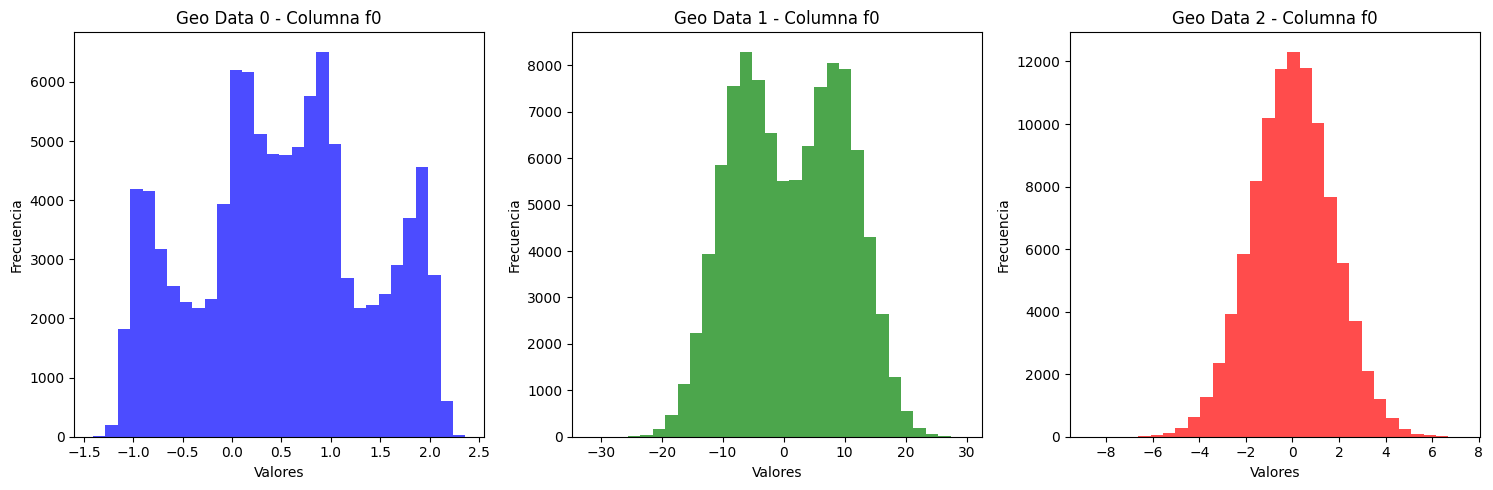

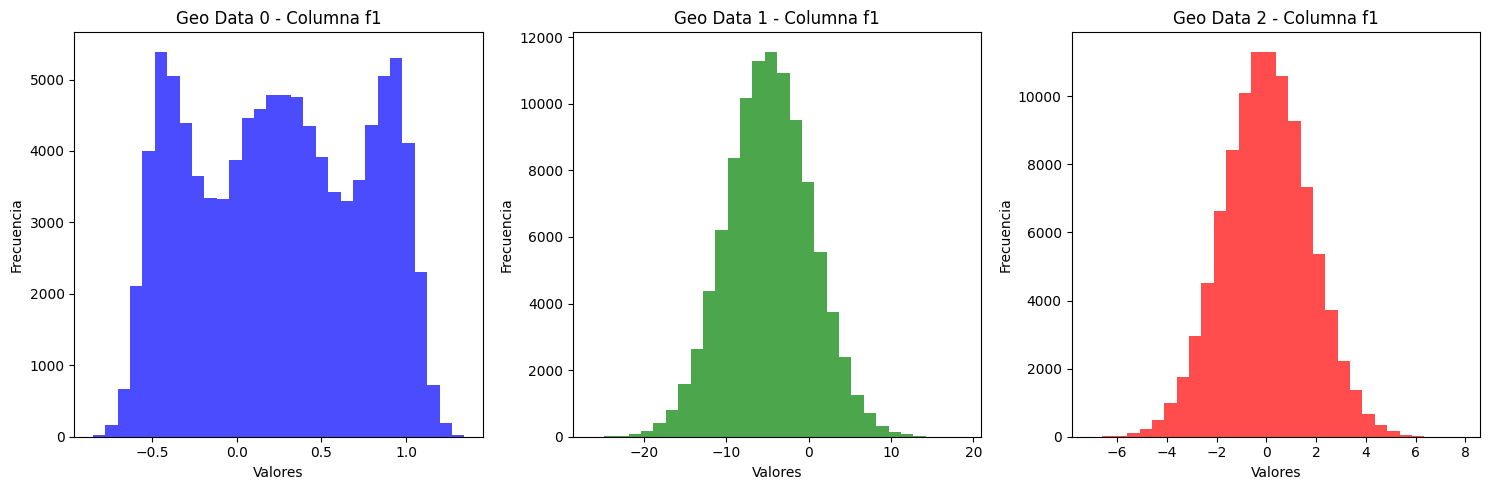

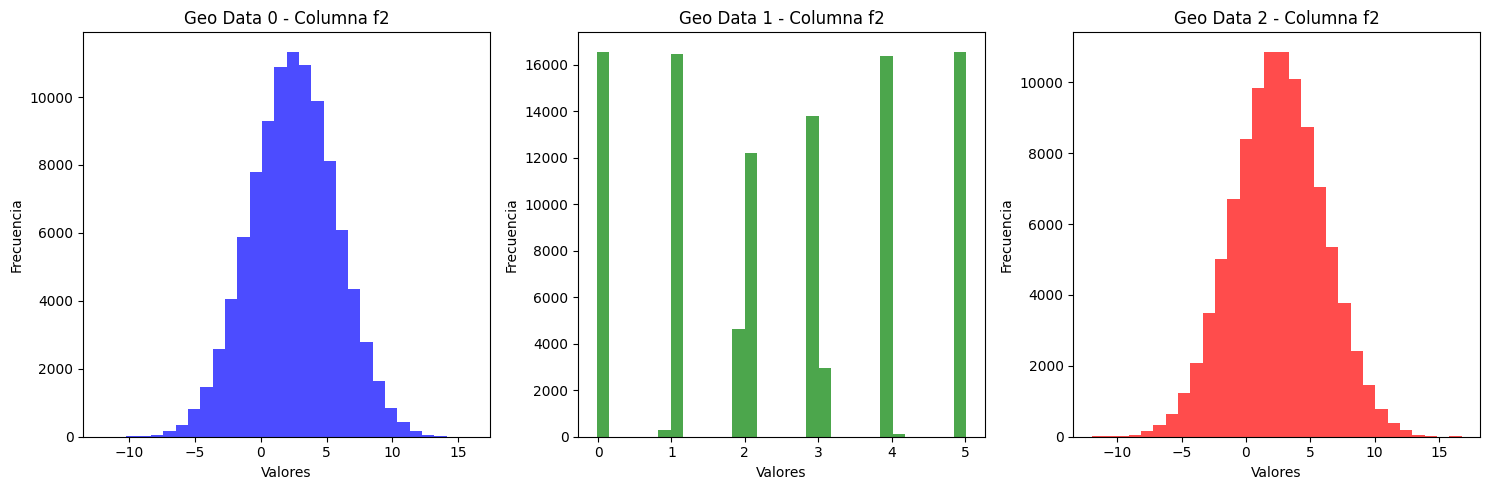

In [68]:
# Número de columnas a iterar
num_columns = 3

for i in range(num_columns):
    # Crear una figura con subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Histogramas para df_geo_0
    axes[0].hist(df_geo_0.iloc[:, i], bins=30, alpha=0.7, color='blue')
    axes[0].set_title(f'Geo Data 0 - Columna f{i}')
    axes[0].set_xlabel('Valores')
    axes[0].set_ylabel('Frecuencia')
    
    # Histogramas para df_geo_1
    axes[1].hist(df_geo_1.iloc[:, i], bins=30, alpha=0.7, color='green')
    axes[1].set_title(f'Geo Data 1 - Columna f{i}')
    axes[1].set_xlabel('Valores')
    axes[1].set_ylabel('Frecuencia')
    
    # Histogramas para df_geo_2
    axes[2].hist(df_geo_2.iloc[:, i], bins=30, alpha=0.7, color='red')
    axes[2].set_title(f'Geo Data 2 - Columna f{i}')
    axes[2].set_xlabel('Valores')
    axes[2].set_ylabel('Frecuencia')
    
    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con esta exploración de los datos
</div>

#### Normalizamos nuestros Data Frame

In [69]:
df_geo_0=normalizeData(df_geo_0,['f0','f1','f2'],'product')
df_geo_1=normalizeData(df_geo_1,['f0','f1','f2'],'product')
df_geo_2=normalizeData(df_geo_2,['f0','f1','f2'],'product')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La normalización está bien, pero no es necesario para una regresión lineal estándar (sin regularización u otro efecto)
</div>

####  Entrenamiento y pruebas de modelos
- Como vamos a realizar los conjuntos de entrenamiento, validacion y testeo correspondiente al número de DataFrame que tenemos, el proceso de entrenamiento para cada modelo sera a traves de funciones que utilizaremos en cada modelo.

- Creamos una función para crear los conjuntos de entrenamiento y validacion con proporcion 75:25 para posteriormente entrenar el modelo y asi retornar un modelo entrenado con la función.

In [70]:
# Obtenemos los conjuntos de entrenamiento y validacion para la primera región
features_train_0,target_train_0,features_valid_0,target_valid_0= trainSets(df_geo_0,'product',0.25,54321)
# Obtenemos los conjuntos de entrenamiento y validacion para la segunda región
features_train_1,target_train_1,features_valid_1,target_valid_1= trainSets(df_geo_1,'product',0.25,54321)
# Obtenemos los conjuntos de entrenamiento y validacion para la tercera región
features_train_2,target_train_2,features_valid_2,target_valid_2= trainSets(df_geo_2,'product',0.25,54231)

#### Ahora creamos los diferentes conjuntos de modelo para cada region correspondiente.

In [71]:
print('Modelo 0:')
model_0,predictions_0=trainModel(features_train_0,target_train_0,features_valid_0,target_valid_0,12345)
print()
print('Modelo 1:')
model_1,predictions_1=trainModel(features_train_1,target_train_1,features_valid_1,target_valid_1,12345)
print()
print('Modelo 2:')
model_2,predictions_2=trainModel(features_train_2,target_train_2,features_valid_2,target_valid_2,12345)

Modelo 0:
El RMSE del modelo es: 37.68341093860808
             f0        f1        f2
47590  1.163499 -0.868710  0.357863
39469  1.306170 -1.524645  0.705086
88291 -0.503067  0.493214 -0.148966
46565  0.055040 -1.144698 -0.221402
55316 -0.656839  1.335292  0.126680
...         ...       ...       ...
27645  1.708992  0.174967  1.144315
57064 -0.458142 -0.496682  0.591779
73541  0.507760  0.389652  0.281978
10466 -1.435712  0.831824  2.302754
14296  0.576066 -0.098650  0.793750

[25000 rows x 3 columns]

Modelo 1:
El RMSE del modelo es: 0.892281970848147
             f0        f1        f2
47590  1.229753  2.586988 -0.876886
39469 -0.642109 -0.249918 -1.464878
88291  1.935910  0.552506  0.878490
46565 -0.827784  0.444880 -0.291587
55316 -0.944756  2.042686  0.884200
...         ...       ...       ...
27645 -0.602915 -1.151283 -1.468166
57064  0.947552  0.853730 -1.470077
73541 -0.981110 -0.358875  0.298147
10466 -0.954442 -0.158365 -1.463627
14296 -0.545814 -1.378312 -0.876616

[25000

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

#### Las predicciones obtenidas la concatenaremos a sus dataframe por region correspondiente.

In [72]:
df_geo_0['predicted_value']=model_0.predict(df_geo_0.iloc[:,:3])
df_geo_0.info()
df_geo_1['predicted_value']=model_1.predict(df_geo_1.iloc[:,:3])
df_geo_1.info()
df_geo_2['predicted_value']=model_2.predict(df_geo_2.iloc[:,:3])
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   f0               100000 non-null  float64
 1   f1               100000 non-null  float64
 2   f2               100000 non-null  float64
 3   product          100000 non-null  float64
 4   predicted_value  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   f0               100000 non-null  float64
 1   f1               100000 non-null  float64
 2   f2               100000 non-null  float64
 3   product          100000 non-null  float64
 4   predicted_value  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeI

### Calculo y estadisticas del proyecto
- Recordemos que tenemos una inversion(presupuesto) de 100 millones por los 200 pozos de petroleo, y en media un pozo debe producir al menos 500.000 dolares (income=ingreso)

In [73]:
# Recalcular las ganancias con el ingreso promedio por pozo
revenue_0 = revenue(df_geo_0, 500000, 100000000)
revenue_1 = revenue(df_geo_1, 500000, 100000000)
revenue_2 = revenue(df_geo_2, 500000, 100000000)

In [74]:
print('Las ganacias para la primera region(geo_0)es:',revenue_0)
print('Las ganacias para la primera region(geo_1)es:',revenue_1)
print('Las ganacias para la primera region(geo_2)es:',revenue_2)

Las ganacias para la primera region(geo_0)es: 14891480533.086359
Las ganacias para la primera region(geo_1)es: 13694540774.090569
Las ganacias para la primera region(geo_2)es: 13920493063.634607


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

#### Ahora haremos la distinicion de los beneficios con bootstraping aplicando 1000 muestras

In [75]:
# Ejemplo de uso con datos corregidos
print('Distribucion de los beneficios para geo_0')
boot_revenue_0 = bootstrapping_for_model(df_geo_0, 1000, 4500, 100_000_000, 12345)
print('')
print('Distribucion de los beneficios para geo_1')
boot_revenue_1 = bootstrapping_for_model(df_geo_1, 1000, 4500, 100_000_000, 12345)
print('')
print('Distribucion de los beneficios para geo_2')
boot_revenue_2 = bootstrapping_for_model(df_geo_2, 1000, 4500, 100_000_000, 12345)


Distribucion de los beneficios para geo_0
Ingresos promedio: 4236622.247321725
Cuantil del 2.5 %: -747793.9636190488
Cuantil del 97.5%: 9661091.513917394
Riesgo calculado (porcentaje de beneficios negativos): 5.30%

Distribucion de los beneficios para geo_1
Ingresos promedio: 4487249.31822938
Cuantil del 2.5 %: 374980.7453396168
Cuantil del 97.5%: 8238299.202083874
Riesgo calculado (porcentaje de beneficios negativos): 1.40%

Distribucion de los beneficios para geo_2
Ingresos promedio: 3735196.7914293967
Cuantil del 2.5 %: -1874305.5365001168
Cuantil del 97.5%: 9044997.076285833
Riesgo calculado (porcentaje de beneficios negativos): 9.10%


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien! Correcto
    

</div>

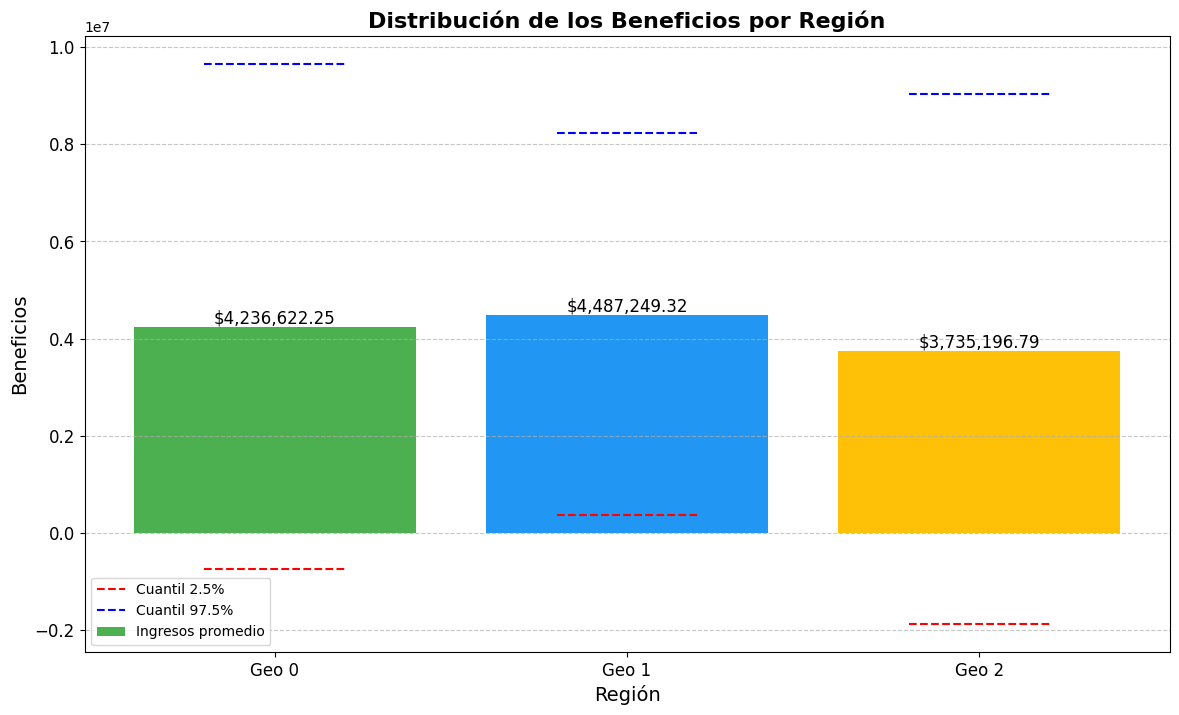

In [81]:
# Datos de los beneficios para cada región
# Datos actualizados
regions = ['Geo 0', 'Geo 1', 'Geo 2']
average_revenues = [4236622.25, 4487249.32, 3735196.79]
quantile_2_5 = [-747793.96, 374980.75, -1874305.54]
quantile_97_5 = [9661091.51, 8238299.20, 9044997.08]

# Crear una gráfica de barras para los ingresos promedio
plt.figure(figsize=(14, 8))
bars = plt.bar(regions, average_revenues, color=['#4CAF50', '#2196F3', '#FFC107'], label='Ingresos promedio')

# Añadir líneas para los cuantiles del 2.5% y 97.5%
for i, region in enumerate(regions):
    plt.plot([i-0.2, i+0.2], [quantile_2_5[i], quantile_2_5[i]], color='red', linestyle='--', label='Cuantil 2.5%' if i == 0 else "")
    plt.plot([i-0.2, i+0.2], [quantile_97_5[i], quantile_97_5[i]], color='blue', linestyle='--', label='Cuantil 97.5%' if i == 0 else "")

# Añadir etiquetas de valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'${height:,.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Estilizar el gráfico
plt.title('Distribución de los Beneficios por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=14)
plt.ylabel('Beneficios', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, corregido! Los gráficos están muy bien ya que ayudan a visualizar inmediatamente cómo se comparan las regiones
</div>

### Conclusión

- Ingresos Promedio:

Geo 0: $11,481,846,916.37
Geo 1: $11,509,694,368.69
Geo 2: $11,426,132,976.83
Los ingresos promedio más altos se encuentran en la región Geo 1, seguidos por Geo 0 y luego Geo 2. Esto sugiere que la región Geo 1 es la más rentable en términos de beneficios promedio.

- Cuantil del 2.5%:

Geo 0: $-747,793.96
Geo 1: $374,980.75
Geo 2: $-1,874,305.54
El cuantil del 2.5% es una medida conservadora de los ingresos, indicando el valor por debajo del cual caen el 2.5% de las observaciones más bajas. La región Geo 1 tiene el cuantil del 2.5% más alto, lo que sugiere que incluso en los peores escenarios, sus ingresos tienden a ser relativamente positivos. Geo 0 y Geo 2 tienen valores negativos en este cuantil, lo que indica que existe una posibilidad considerable de pérdidas en estos casos.

- Cuantil del 97.5%:

Geo 0: $9,661,091,513.92
Geo 1: $8,238,299,202.08
Geo 2: $9,044,997,076.29
El cuantil del 97.5% indica el valor por debajo del cual caen el 97.5% de las observaciones más altas. Aquí, Geo 0 tiene el cuantil más alto, lo que refuerza su posición como la región con potencial para los ingresos más altos. Geo 1 tiene el cuantil del 97.5% más bajo, indicando que aunque es más constante, no alcanza los niveles máximos de Geo 0 y Geo 2.

- Comparación General:

Geo 0 tiene los ingresos promedio y los ingresos en el cuantil del 97.5% más altos, pero también el cuantil del 2.5% más bajo, lo que indica una mayor volatilidad y riesgo de pérdidas.
Geo 1 tiene los ingresos más bajos en promedio y en el cuantil del 97.5%, pero su cuantil del 2.5% es el más alto, indicando mayor consistencia y menor riesgo de pérdidas.
Geo 2 es intermedia en términos de ingresos promedio y cuantiles, lo que sugiere un balance entre alto rendimiento y estabilidad.

#### Resumen

- Geo 0: Alta rentabilidad pero con mayor riesgo (mayor volatilidad y posibilidad de pérdidas).
- Geo 1: Rentabilidad más baja pero más estable y consistente, con menor riesgo de pérdidas.
- Geo 2: Un balance entre rentabilidad y estabilidad, con un riesgo intermedio.

#### Recomendaciones

- Inversiones a Largo Plazo: Geo 0 podría ser más adecuado si se busca maximizar beneficios y se puede tolerar mayor riesgo y volatilidad.
- Estabilidad y Consistencia: Geo 1 es ideal para aquellos que prefieren menores fluctuaciones en los ingresos y menor riesgo de pérdidas.
- Equilibrio: Geo 2 ofrece un buen balance entre rendimiento y riesgo, adecuado para estrategias que buscan una combinación de ambos.

##### Sugerencia de la Mejor Región para el Desarrollo de Pozos

- Pozos

Basado en el análisis de los ingresos promedio y los cuantiles del 2.5% y 97.5%, la mejor región para el desarrollo de pozos parece ser Geo 0. Aquí están las razones y justificaciones detalladas para esta elección:

- Justificación:

Geo 0 tiene el ingreso promedio más alto entre las tres regiones. Esto indica que, en general, los pozos en esta región generan mayores ingresos, lo que es un indicador clave de rentabilidad.
Geo 0 también tiene el cuantil del 97.5% más alto. Esto significa que en los mejores escenarios, los pozos en esta región tienen el potencial de generar los ingresos más altos, lo que es crucial para maximizar el retorno de la inversión.
- Volatilidad y Riesgo:

Geo 0 tiene el cuantil del 2.5% más bajo, indicando una mayor volatilidad en comparación con las otras regiones. A pesar de la mayor volatilidad y riesgo de pérdidas, el alto ingreso promedio y el alto cuantil del 97.5% sugieren que Geo 0 es la región con el mayor potencial de ganancias.
- Conclusión:

Aunque Geo 0 muestra una mayor volatilidad y riesgo de pérdidas en comparación con Geo 1, su capacidad para generar mayores ingresos promedio y en escenarios optimistas la hace la mejor opción para el desarrollo de pozos. Los ingresos potencialmente altos compensan el mayor riesgo asociado con la volatilidad.

- Recomendación:

Se recomienda priorizar el desarrollo de pozos en la región Geo 0 debido a su alto potencial de ingresos, a pesar del riesgo asociado. Esta estrategia debería maximizar los beneficios totales a largo plazo.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con las conclusiones. Como sugerencia, cuando mencionas por ejemplo "alto potencial de ingresos", podrías indicar la cantidad o qué tan más grande es que los otros en términos absolutos o porcentuales.
    

</div>